# MOD510 - Modeling and Computational Engineering

## Group 4
### Group members:
**Andreas Nonslid Håvardsen**

**Daniel Fylling**

## Project 1 - Tip of the iceberg

### Introduction

The objective of this project is to...
1. get experience in structuring and writing a report.
2. write new functions and classes in Python.
3. explore numerical round-off and truncation errors.
4. be introduced to useful Python libraries for scientific computing.

### Exercise 1 - Finite-precision airthmetic

#### Part 1

In [ ]:
import sys
sys.float_info

1. max=1.7976931348623157e+308<br>
The largest number that can be represented by the IEEE.
2. max_exp=1024<br>
2046-1023 = 1023 is the highest base 2 exponent this system accepts.
3. max_10_exp=308<br>
The numbering convension can almost reach $2^{1024}$, but not quite - $(2-2^{-52})*2^{1023}$.
4. min=2.2250738585072014e-308, <br>
The smallest number that can be represented by the IEEE.
5. min_exp=-1021, <br>
1-1023 = -1022, which is the lowest base 2 exponent this system accepts, so not clear why this message says -1021.
6. min_10_exp=-307, <br>
Minimum exponent is -308, so not clear why this says -307.
7. dig=15, mant_dig=53,<br>
Max digits producable in exp10 with the 53 bits available for the mantissa is 15.
8. epsilon=2.220446049250313e-16 <br>
Epsilon is the machine error, or rounding error, which is the smallest number that can be added to 1 to get a result bigger than 1.
9. radix=2<br>
2 means the computing system is binary.
10. rounds=1<br>
A constant, not clear what is the significance.

#### Part 2

In [ ]:
max=(2-2**-52)*2**1023
min=2**-1022
epsilon=2**-52
print(max,min,epsilon)

#### Part 3

Base 10 numbers are converted to base 2 when stored in a computer. Only fractions of a power of 2 $(k/2^n)$ are precicely converted. All other fractions are approximated with binary representation. Due to this rounding, when two base10 fractions are added, their binary counterparts may not exactly add up to the binary counterpart of the base10 sum of the fractions.

#### Part 4

The reason for not checking dirctly if numbers are the same is due to the rounding as discussed in part 3.

Rather than checking if values are the same it may be more applicable to check how close the numbers are.
We can set a mark for the accuracy we like (in the code below $10^{-9}$), and if the numbers are within the accuracy, the check will return true.

In [ ]:
a=0.3
b=0.1+0.2
epsilon=2**-52

print(a==b)
print(abs(a-b)<=epsilon)

### Exercise 2
#### Part 1

In [ ]:
import numpy as np 
x = np.linspace(0, 1, 10)
y = x.tolist()

print(np.exp(y)) # Apply f(t)=exp(t) to each element in the array x.
print(np.exp(-y)) # Apply the function f(t)=exp(-t) to each element of x.

"exp(y)":
Returns the same result for a list as for a numpy array.

"exp(-y)":
Returns an error message due to not being able to apply the negative sign to the list.

A for-loop can be used to apply a certain function to each element within a list, as shown below.

In [ ]:
import numpy as np 
x = np.linspace(0, 1, 10)
y = x.tolist()

print(np.exp(y)) 
result=[]
for i in y:
    np.exp(-i) 
    result.append(i)
print(result)

#### Part 2

np.zeros(20) <br>
Returns array with 20 elements, all zeros.

np.ones(20) <br>
Returns array with 20 elements, all ones.

np.linspace(0, 10, 11) <br>
Returns array with 11 elements, equaly divided from (and including) 0, to (and including) 10.

np.linspace(0, 10, 11, endpoint=False) <br>
Returns array with 11 elements, equaly divided from (and including) 0, to (and excluding) 10.

np.arange(5) <br>
Returns array with 5 elements, starting with 'zero' and continues counting whole numbers.

vector = np.arange(5) + 1 <br>
When adding a number to a Numpy array the number is added to each element.

2*vector <br>
When mulitplying a factor with a Numpy array the factor is mulitplied to each element.

Python code substitutes:

In [ ]:
#np.zeros(20)
n = 20
zeros = [0]*n
print(zeros)

In [ ]:
# np.ones(20)

n = 20
ones = [1]*n
print(ones)

In [ ]:
# np.linspace(0, 10, 11)
numel = 11
my_list = list(range(numel))
my_list2 = [i for i in range(numel)]
print(my_list)
print(my_list2)

In [ ]:
# np.linspace(0, 10, 11, endpoint=False)

x = 0
y = 10
points = 11
endpoint = False

if endpoint == False:
    step=(y-x)/points
else:
    step= (y-x+1)/points

my_list = []
for i in range(points):
    my_list.append(x + i*step)

print(my_list)

In [ ]:
#vector = np.arange(5) + 1
#2*vector

n = 5
x = 1
y = 2

my_list = list(range(n))

for i, f in enumerate(my_list):
    my_list[i]=(f+x)

for i, f in enumerate(my_list):
    my_list[i]=f*y

print(my_list)

#### Part 3

The "and" operator does not work because it is used to combine single conditional statements. It struggles with comparing whole arrays in comparison to singular elements.
The "&" operator is used to compare binary numbers, represented by 'True' and 'False' in this case.

#### Part 4
np.where(array_of_numbers > 17)[0] <br>
Returns an array containing the index of the elements passing the condition.<br>
Adding [0] to the end converts the array containing output and not full tuple including type info.

np.where(array_of_numbers > 17, 1, 0)<br>
Returns an array of equal size to array_of_numbers, subtituting values passing the condition by '1' and the values failing the condition by '0'.

### Exercise 3, Part I
#### Part 1

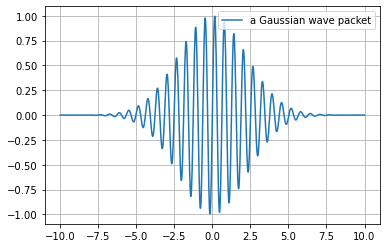

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def f(x, a = 0.1, b = 10):
    return np.sin(b*x)*np.exp(-a*x*x)

def f_plot(f, xmin, xmax, res = 1000):
    x_all = np.linspace(xmin, xmax, res)
    y_all = []    
    for x in x_all:
        y = f(x)
        y_all.append(y)
    plt.plot(x_all, y_all, label='a Gaussian wave packet')
    plt.legend()
    plt.grid()
    return

xmin = -10
xmax = 10

f_plot(f,xmin,xmax)

#### Part 2

In [ ]:
def df_analytical(x, a=0.1, b=10):
    return b*np.cos(b*x)*np.exp(-a*x*x)-2*a*x*np.sin(b*x)*np.exp(-a*x*x)

x=1
print(df_analytical(x))

#### Part 3

In [ ]:
import numpy as np

def f_wave(x, a=0.1, b=10):
    return np.sin(b*x)*np.exp(-a*x*x)

def df_forward(x,f_wave,h,*args):
    return (f(x+h)-f(x))/h

x=1
h=1e-2
print(df_forward(x,f,h))

#### Part 4

In [ ]:
import numpy as np

def f_wave(x, a=0.1, b=10):
    return np.sin(b*x)*np.exp(-a*x*x)
    
def df_central(x,f,h,*args):
    return (f(x+h,*args)-f(x-h,*args))/h*0.5

x=1
h=1e-2
print(df_central(x,f_wave,h))

#### Part 5

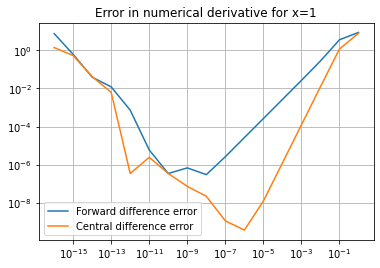

In [7]:
import matplotlib.pyplot as plt
import numpy as np

h_all = np.logspace(0,-16,17)
x = 1

def f_wave(x, a=0.1, b=10):
    return np.sin(b*x)*np.exp(-a*x*x)

def df_analytical(x, a=0.1, b=10):
    return b*np.cos(b*x)*np.exp(-a*x*x)-2*a*x*np.sin(b*x)*np.exp(-a*x*x)

def df_forward(x,f,h,*args):
    return (f(x+h,*args)-f(x,*args))/h

def df_central(x,f,h,*args):
    return (f(x+h,*args)-f(x-h,*args))/h*0.5

y_analytical=df_analytical(x)
y_forward=[]
y_central=[]
for h in h_all:
    y=df_forward(x, f_wave, h)
    y_forward.append(y)
    y=df_central(x, f_wave, h)
    y_central.append(y)

plt.plot(h_all,abs(y_forward-y_analytical),label='Forward difference error')
plt.plot(h_all,abs(y_central-y_analytical),label='Central difference error')
plt.yscale('log')
plt.xscale('log')
plt.title('Error in numerical derivative for x={}'.format(x))
plt.legend()
plt.grid()


Observations:
- Error is very high at h=1.
    - This is expected as h=1 is a very big step at this scale.
- Error decreases as h decreases down to a certain point.
    - This is expected as accuracy improves when reducing h.
- Error increase after reducing h beyond a certain point.
    - This is expected as the machine error is gaining traction at this point.

- It can also be observed that central difference is generally more accurate than forward difference.
    - This is also expected based on the analytic formulas for their respective error terms, where central difference contains a higher order of h.
    - This fact can also help explain why the central difference curve breaks off at a higher magnitude of h, as for h smaller than 1, h*h will be even smaller.

### Exercise 3, Part II
#### Part 1 and 2

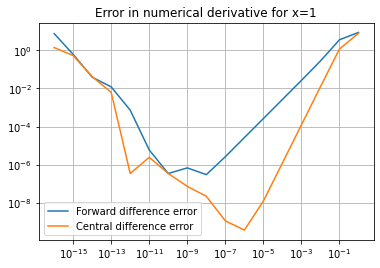

In [8]:
import matplotlib.pyplot as plt
import numpy as np

class WavePacket:

    def __init__(self, a=0.1, b=10):
        
        self.a = a
        self.b = b
        self.h_all = np.logspace(0,-16,17)
        self.y_forward=[]
        self.y_central=[]
        
    def f_wave(self, x):
        return np.sin(self.b*x)*np.exp(-self.a*x*x)
    
    def df_analytical(self, x):
        return self.b*np.cos(self.b*x)*np.exp(-self.a*x*x)-2*self.a*x*np.sin(self.b*x)*np.exp(-self.a*x*x)

    def df_forward(self, x, h):
        return (self.f_wave(x+h)-self.f_wave(x))/h

    def df_central(self, x, h):
        return (self.f_wave(x+h)-self.f_wave(x-h))/h*0.5

    def plot(self, x):
        for i in self.h_all:
            y=self.df_forward(x, i)
            self.y_forward.append(y)
            y=self.df_central(x, i)
            self.y_central.append(y)

        self.y_analytical=self.df_analytical(x)

        plt.plot(self.h_all,abs(self.y_forward-self.y_analytical),label='Forward difference error')
        plt.plot(self.h_all,abs(self.y_central-self.y_analytical),label='Central difference error')
        plt.yscale('log')
        plt.xscale('log')
        plt.title('Error in numerical derivative for x={}'.format(x))
        plt.legend()
        plt.grid()
        return

WavePacket().plot(x=1)

### Exercise 4 - A song of ice and fire?

#### Part 1

In [43]:
import rockhound as rh
import cmocean
import matplotlib.pyplot as plt
import numpy as np

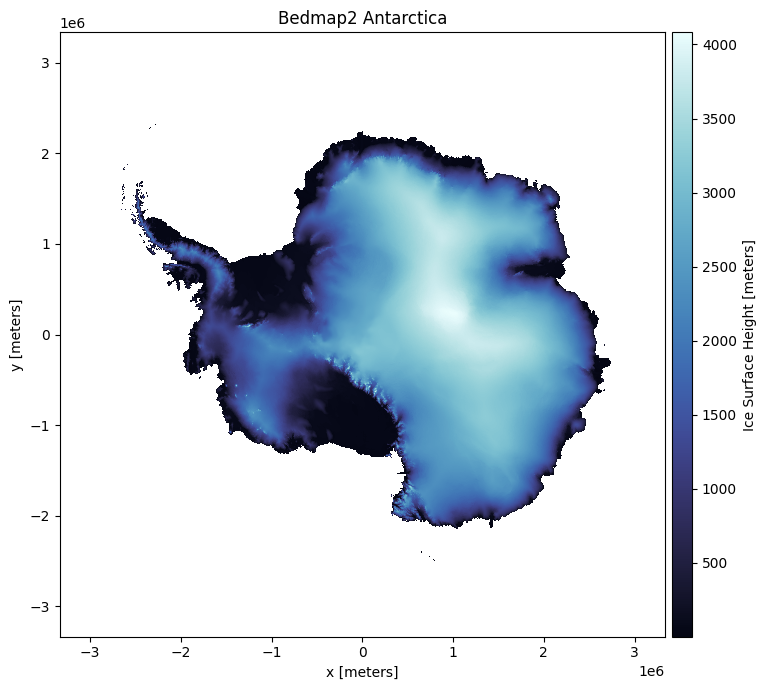

In [44]:
bedmap = rh.fetch_bedmap2(datasets=["thickness","surface","bed"])
plt.figure(figsize=(8,7))
ax = plt.subplot(111)
bedmap.surface.plot.pcolormesh(ax=ax,cmap=cmocean.cm.ice,\
                               cbar_kwargs=dict(pad=0.01, aspect=30))
plt.title("Bedmap2 Antarctica")
plt.tight_layout()
plt.show()

#### Part 2

Cross section

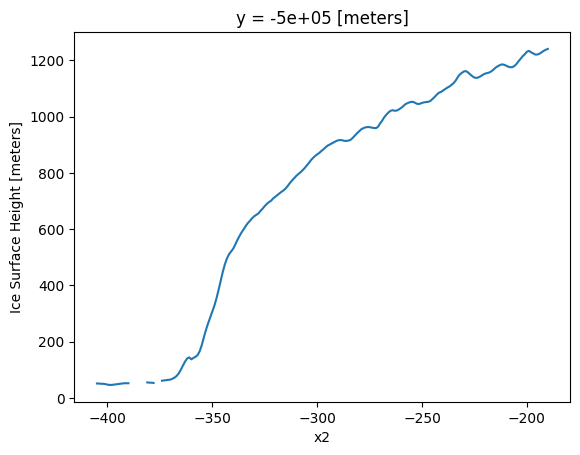

In [45]:
bed1d = bedmap.sel(y=-0.5e6, x=slice(-1.6e6,-1.35e6))
bed1d = bed1d.assign_coords({"x2":((bed1d.x+1.16e6)/1e3)})
bed1d.surface.plot(x='x2')

In [46]:
# "thickness","surface","bed"
thickness_values_1d = np.array(bed1d['thickness'].values)
surface_elevation_values_1d = np.array(bed1d['surface'].values)
bedrock_elevation_values_1d = np.array(bed1d['bed'].values)

Freeboard level

In [47]:
def freeboard(surface, thickness, bedrock):
    pw = 997 # Water density in kg/m^3
    pice = 917 # Ice density in kg/m^3
    return -(surface-thickness)*((pw/pice)-1)
calculatedFreeboard = freeboard(surface_elevation_values_1d, thickness_values_1d, \
    bedrock_elevation_values_1d)

Cross sections

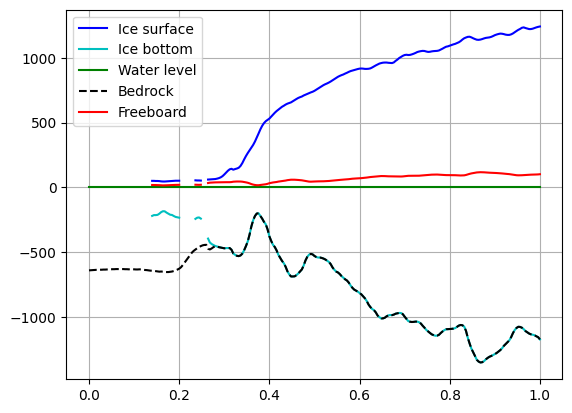

In [48]:
iceBottom = surface_elevation_values_1d-thickness_values_1d

x_val   = np.linspace(0,1,len(thickness_values_1d))
y_vals  = [surface_elevation_values_1d, iceBottom, np.zeros([len(thickness_values_1d),1]),\
    bedrock_elevation_values_1d, calculatedFreeboard]
labels  = ["Ice surface", "Ice bottom", "Water level", "Bedrock", "Freeboard"]
cols    = ['b','c','g','k', 'r']
points  = ['-','-','-','--', '-']
for y_val,point,col,label in zip(y_vals,points,cols,labels):
    plt.plot(x_val,y_val,point,c=col,label=label)
plt.grid()
plt.legend()
plt.show()

**Q**: *Explain what you see. Is the shape of the bedrock important for sea level rise?*

**A**: 

The direct observation is that the further down from water level the bedrock is, the more ice can be in a given $(x,y)$ coordinate without increasing the SLR. 

The next observation from the freeboard calculations is that there can be more ice than simply to the surface level the deeper it is to the bedrock, because of the difference in densities of water and ice. 

#### Part 3

SLR of all data

In [49]:
# "thickness","surface","bed"
thickness_values = np.array(bedmap['thickness'].values)
surface_elevation_values = np.array(bedmap['surface'].values)
bedrock_elevation_values = np.array(bedmap['bed'].values)
print(np.shape(thickness_values))
print(np.shape(surface_elevation_values))
print(np.shape(bedrock_elevation_values))

(6667, 6667)
(6667, 6667)
(6667, 6667)


In [50]:
from math import isnan

SLR = np.zeros_like(thickness_values)
for x in range(np.shape(SLR)[0]):
    for y in range(np.shape(SLR)[1]):
        if isnan(surface_elevation_values[x,y]):
            surface_elevation_values[x,y] = 0
        if isnan(thickness_values[x,y]):
            thickness_values[x,y] = 0
        if isnan(bedrock_elevation_values[x,y]):
            bedrock_elevation_values[x,y] = 0
        SLR[x,y] = freeboard(surface_elevation_values[x,y], thickness_values[x,y], \
            bedrock_elevation_values[x,y])
surface_elevation_values = (surface_elevation_values - SLR)*(1000*1000)

<Figure size 800x700 with 0 Axes>

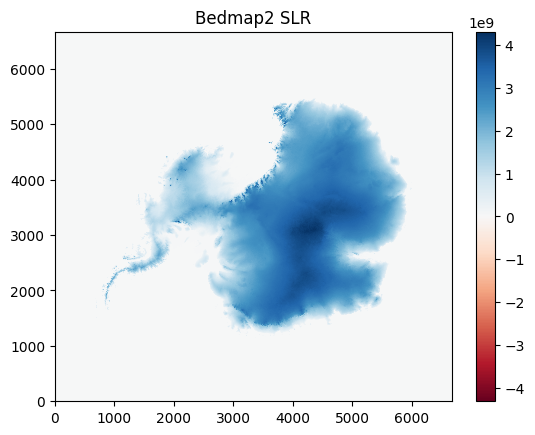

In [51]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

z_min, z_max = -np.abs(surface_elevation_values).max(), np.abs(surface_elevation_values).max()
plt.figure(figsize=(8,7))
fig, ax = plt.subplots()
SLRmesh = ax.pcolormesh(surface_elevation_values, cmap='RdBu', vmin=z_min, vmax=z_max)
fig.colorbar(SLRmesh)
plt.title("Bedmap2 SLR")
plt.show()

In [58]:
tot = sum(sum(surface_elevation_values))
print(f'Total amount of SLR in m^3 = {tot}')
print(f'Which results in a sea level rise of {tot/(0.71*5.01e+14)}m')
print('With formula: SLR / (Water surface area on earth)')

Total amount of SLR in m^3 = 2.6817665044839804e+16
Which results in a sea level rise of 75.3919345670344m
With formula: SLR / (Water surface area on earth)


Higher is more SLR if melted.


Code explanation:
1. Calculate freeboard level
2. Find height of iceberg above freeboard
3. Multiply by the size of each data entry in $m^2$ -> $1000m^2$ per datapoint
4. Plot

#### Part 4

**Q**: *How can we use the bedmap data to improve decision making?*

**A**:

From the data, the severity of possible negative changes in the climate and the resulting melting of icebergs can be determined. By taking this into consideration, a stronger case can be made to prioritize behavioural/policy changes to reduce the possible negative changes.

**Q**: *What are some limitations in your estimated calculation of the sea level rise?*

**A**:

First and foremost it is a estimate, with approximations down to each $1000m^2$ used. This brings all the issues that concerns approximate solutions. It also only takes into account the given data and uses the formulas given so any more advanced models that might be closer to reality is not used here. 

Any other ice that would melt in the same situations that the Antarctica melts is ignored.